In [7]:
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

plt.style.use("ggplot")

%matplotlib inline

import urllib

import os

In [36]:
# Downloaded from https://console.aws.amazon.com/rekognition/home?region=us-east-1#/video-analysis
# path = "./test_vid.json"
# path2 = "./data/test_vid_2_ult_frisbee.json"
# path3 = "/Users/sewald101/Downloads/test_vid-ferry-2.json"
path_cal = "../data/pose_calibration.json"

In [8]:
# Raw Rekognition response data written to json
path5 = "../data/Measureyes_SecurityCamFootage_Clip_01_FootTraffic_HT_results_001.json"

In [25]:
def read_rekognition_json_to_df(path, filter_no_poses=True):
    """Convert AWS Rekognition output json into Pandas DataFrame.
    Works for json responses written by AWS Rekognition GetFaceSearch function (or as run in VidFaceSearch.py)
    
    Arguments:
        path -- (string) path/file 
        filter_no_poses -- (bool) includes only data in which a face pose was detected. If False,
                           return records for all unique persons detected in video and indexed.
    """
    
    with open(path) as f:
        d = json.load(f)
   
    df = json_normalize(d['Persons'], meta='Face', record_prefix=True)
               
    
    cols = [
    "Timestamp",
    "Person.Index",
    "Person.Face.BoundingBox.Top", # BoundingBox Top and Left for position of the face in the frame
    "Person.Face.BoundingBox.Left",
    "Person.Face.Pose.Pitch",
    "Person.Face.Pose.Roll",
    "Person.Face.Pose.Yaw",
        ]
        
    rows = df["Person.Face.Pose.Pitch"].map(lambda x: not np.isnan(x)) # filter out frames with no faces
    if filter_no_poses:
        df = df.loc[rows, cols]
    else:
        df = df[cols]
    
    df.sort_values("Timestamp", inplace=True)
    df.index = np.arange(len(df))
    
    return df

In [26]:
df5 = read_rekognition_json_to_df(path5, filter_no_poses=False)

In [37]:
df5

,Timestamp,Person.Index,Person.Face.BoundingBox.Top,Person.Face.BoundingBox.Left,Person.Face.Pose.Pitch,Person.Face.Pose.Roll,Person.Face.Pose.Yaw
0,0,0,NaN,NaN,NaN,NaN,NaN
1,0,1,NaN,NaN,NaN,NaN,NaN
2,0,2,NaN,NaN,NaN,NaN,NaN
3,0,3,NaN,NaN,NaN,NaN,NaN
4,0,4,NaN,NaN,NaN,NaN,NaN
5,0,5,NaN,NaN,NaN,NaN,NaN
6,0,6,NaN,NaN,NaN,NaN,NaN
7,0,7,NaN,NaN,NaN,NaN,NaN
8,41,7,NaN,NaN,NaN,NaN,NaN
9,41,6,NaN,NaN,NaN,NaN,NaN


In [35]:
df5["Person.Index"].unique()[-1] + 1

55

In [ ]:
df_face_calibration

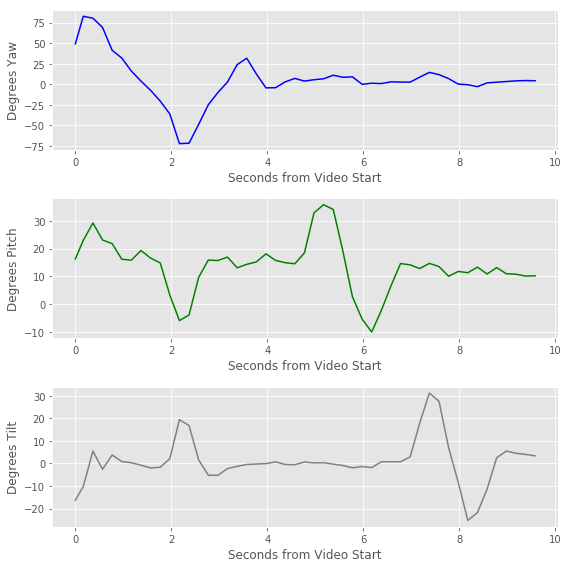

In [57]:
# Graph pose_calibration.json
# Positive degrees yaw = face turned toward camera right (viewer left)
# Positive degrees pitch = face turned upward
# Positive degrees roll = face tilted camera clockwise (viewer CCW)

x = df4["Timestamp"] / 1000
yaw = df4["Person.Face.Pose.Yaw"]
pitch = df4["Person.Face.Pose.Pitch"]
roll = df4["Person.Face.Pose.Roll"]

data = [yaw, pitch, roll]

colors = ["blue", "green", "0.5"]

y_labels = ["Degrees Yaw", "Degrees Pitch", "Degrees Tilt"]

fig, axs = plt.subplots(3, 1, figsize=(8, 8))
for i, ax in enumerate(axs.flatten()):
    ax.plot(x, data[i], c=colors[i])
    ax.set_ylabel(y_labels[i])
    ax.set_xlabel("Seconds from Video Start")
    
plt.tight_layout()

plt.show()

In [68]:
df5 = read_rekognition_json_to_df(path3)

In [70]:
df5['Person.Index'].unique()

array([ 3,  4,  5,  6,  8, 10, 11])

In [62]:
# number of faces detected in single frames
q = df4["Timestamp"].value_counts()
idx = q.index.sort_values()
q[idx]

1233     1
1633     1
1833     1
2033     2
2633     1
3433     1
4433     1
4633     2
4833     3
5033     1
5233     1
5433     3
5633     1
6433     1
8033     1
8233     1
8433     1
8633     1
8833     2
9033     2
9233     3
9433     2
9633     2
9833     1
11033    1
11233    1
11633    1
11833    1
15433    1
16633    1
17233    1
17633    2
17833    1
18033    1
18233    1
18433    2
18633    2
18833    2
19033    1
19233    1
19633    2
20099    1
20299    2
22499    1
22699    1
27099    3
27299    3
27499    4
27699    3
27899    5
28099    3
28299    4
28499    2
28699    1
28899    1
29099    1
29299    1
29499    1
29699    1
Name: Timestamp, dtype: int64

In [8]:
# Tracks multiple people at once
df4[df4["Timestamp"] == 9175]

,Timestamp,Person.Index,Person.Face.Pose.Pitch,Person.Face.Pose.Roll,Person.Face.Pose.Yaw
187,9175,0,6.333836,15.170354,-69.307373
188,9175,1,-43.662678,-26.979006,70.037636


In [14]:
with open(path2) as f:
    d = json.load(f)

In [15]:
# Examine the read-in json; its keys...
d.keys()

dict_keys(['ModerationLabels', 'fileName', 'Labels', 'Celebrities', 'Persons'])

In [63]:
len(d['Persons'])

1204

In [20]:
# This is the field with the critical data
df = pd.DataFrame(d['Persons'])

In [21]:
df.head()

,Person,Timestamp
0,"{'BoundingBox': {'Height': 0.8629629611968994,...",499
1,"{'BoundingBox': {'Height': 0.7546296119689941,...",499
2,"{'BoundingBox': {'Height': 0.8416666388511658,...",566
3,"{'BoundingBox': {'Height': 0.7574074268341064,...",566
4,"{'BoundingBox': {'Height': 0.7083333134651184,...",566


In [37]:
# Here's a single person and face identified and characterized in a single frame of the video
# From: https://docs.aws.amazon.com/rekognition/latest/dg/persons.html
# Timestamp is in milliseconds since the start of the video
# Index – A unique identifier for tracking the person throughout the video. Can they be added to the library?
# Yes! https://docs.aws.amazon.com/rekognition/latest/dg/add-faces-to-collection-procedure.html
datum = d['Persons'][1000]['Person']
datum

{'BoundingBox': {'Height': 0.35185185074806213,
  'Left': 0.3687500059604645,
  'Top': 0.4611110985279083,
  'Width': 0.0755208358168602},
 'Index': 41}

In [30]:
# Playing with json_normalize to flatten nested json data...
# Good tutorial here: https://www.kaggle.com/jboysen/quick-tutorial-flatten-nested-json-in-pandas
df2 = json_normalize(d["Persons"], meta="Person.Face.Pose", record_prefix=True)

# Examine each column
# Note: Person.Face.Landmarks is a nested list
col_idx = 16
df2.columns[col_idx], df2.iloc[0, col_idx]

('Timestamp', 499)

In [3]:
counter = 1
b = "big_file_name"
qqq = b + "_results_" + "%03d" % (counter,)
qqq

'big_file_name_results_001'

In [4]:
b.split("/")[-1]

'big_file_name'